IMPORT DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


IMPORT DATASET

In [34]:
df = pd.read_csv('tested.csv')

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


DATA EXPLORATION

In [36]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [44]:
df.shape

(418, 7)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


DATA CLEANING

In [38]:
df.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,34.5,0,0,NaN,Q
1,1,3,female,47.0,1,0,NaN,S
2,0,2,male,62.0,0,0,NaN,Q
3,0,3,male,27.0,0,0,NaN,S
4,1,3,female,22.0,1,1,NaN,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,NaN,S
414,1,1,female,39.0,0,0,C105,C
415,0,3,male,38.5,0,0,NaN,S
416,0,3,male,NaN,0,0,NaN,S


In [40]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Cabin       327
Embarked      0
dtype: int64

In [41]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [42]:
del df['Cabin']


In [43]:
df['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

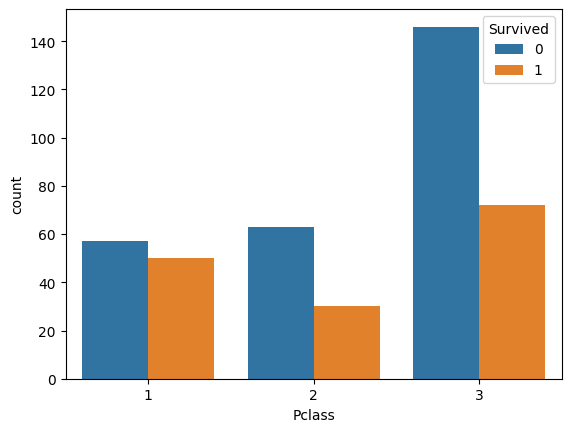

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: Pclass, dtype: int64

In [11]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.show()
df.groupby(by=['Pclass','Survived'])['Pclass'].count()

In [12]:
df['Embarked'].isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Embarked, Length: 418, dtype: bool

In [13]:
df.groupby(by=['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [14]:
df['Embarked'].fillna('C',inplace= True)
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool

In [47]:
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [48]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [49]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [50]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [21]:
df[df['Survived']==1] #only survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
6,898,1,3,"Connolly, Miss. Kate",1,30.00000,0,0,330972,7.6292,2
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00000,0,0,2657,7.2292,1
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.00000,1,0,21228,82.2667,0
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",1,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,0
410,1302,1,3,"Naughton, Miss. Hannah",1,30.27259,0,0,365237,7.7500,2
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.00000,1,0,19928,90.0000,2
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",1,28.00000,0,0,347086,7.7750,0


In [22]:
(df['Survived']==1).sum()#total survived

152

those who have survived, belongs to which classes?

In [23]:
survived = df[df['Survived']==1]
survived['Pclass'].value_counts().keys()

Int64Index([3, 1, 2], dtype='int64')

In [24]:
survived['Pclass'].value_counts().values

array([72, 50, 30])

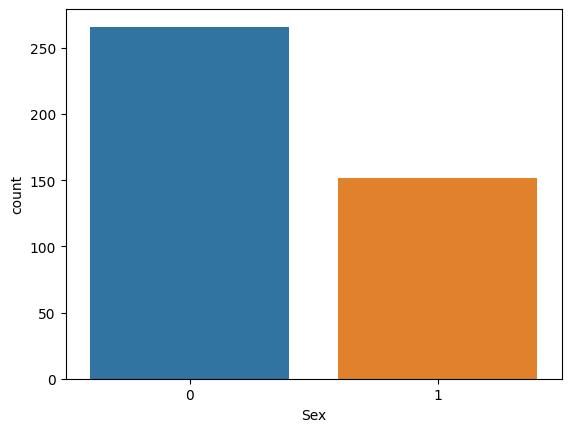

In [25]:
ax=sns.countplot(x ='Sex', data = df)
plt.show()

In [45]:
c=df.corr()
c

<ipython-input-45-d9e4e726f1fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.108615,-0.000011,0.099943,0.159120
Pclass,-0.108615,1.000000,-0.440782,0.001087,0.018721
Age,-0.000011,-0.440782,1.000000,-0.079535,-0.045073
SibSp,0.099943,0.001087,-0.079535,1.000000,0.306895
Parch,0.159120,0.018721,-0.045073,0.306895,1.000000


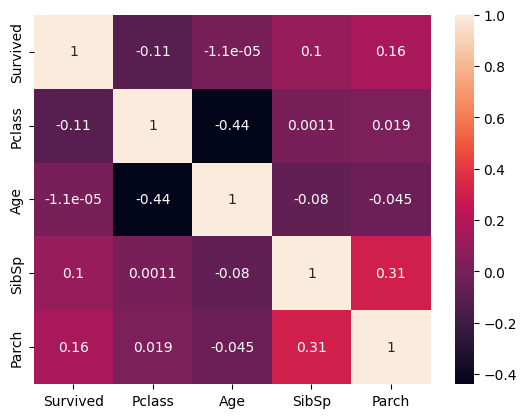

In [46]:
sns.heatmap(c, annot=True);